# Projeto de IA: Titanic

O link para baixar o conjunto de dados está [aqui]().

Esse conjunto é um dos clássicos para a análise de dados e inteligência artificial.

O intuito é desenvolver um modelo de IA capaz de prever se um determinado passageiro do Titanic sobriveveria.

Os dados que temos são:
- **pclass**: Classe do passageiro
- **survived**: Se o passageiro sobreviveu ou não
- **name**: Nome do passageiro
- **sex**: Sexo do passageiro
- **age**: Idade do passageiro
- **sibsp**: Quantos irmão o passageiro tinham embarcado
- **parch**: Quantos parentes o passageiro tinham embarcados
- **ticket**: Número do ticket
- **fare**: Preço da passagem
- **cabin**: Cabine do passageiro
- **embarked**: Onde o passageiro embarcou
- **boat**: Barco salva-vidas que o passageiro entrou
- **body**: Número do corpo recuperado
- **home.dest**: Destino final

## Importar as bibliotecas

In [1]:
# --- Importar o Pandas e o NumPy --- #
import numpy as np
import pandas as pd

## Tratar os dados

In [2]:
# --- Abrir o arquivo Excel --- #
arquivo = '/content/titanic3.xls'
df = pd.read_excel(arquivo)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# --- Retirar as colunas que não possuem relação com a sobrevicência do passageiro --- #
df.drop(
    ['name', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'],
    axis=1,
    inplace=True
)
df.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2.0000,1,2,S
3,1,0,male,30.0000,1,2,S
4,1,0,female,25.0000,1,2,S


In [4]:
# --- Informações dos dados --- #
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [5]:
# --- Verificar quantos dados faltam em cada coluna --- #
df.isnull().sum()

,0
pclass,0
survived,0
sex,0
age,263
sibsp,0
parch,0
embarked,2


In [6]:
# --- Colocar o valor médio da idade como substituto para NaN --- #
df['age'].replace(np.nan, df['age'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-1022818996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan, df['age'].mean(), inplace=True)


,0
pclass,0
survived,0
sex,0
age,0
sibsp,0
parch,0
embarked,2


In [8]:
# --- Retirar as linhas onde o embarque não existe --- #
df.dropna(
    axis=0,
    how='any',
    inplace=True
)
df.isnull().sum()

,0
pclass,0
survived,0
sex,0
age,0
sibsp,0
parch,0
embarked,0


In [9]:
# --- Verificar as informações dos dados --- #
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   sex       1307 non-null   object 
 3   age       1307 non-null   float64
 4   sibsp     1307 non-null   int64  
 5   parch     1307 non-null   int64  
 6   embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 81.7+ KB


In [11]:
# --- Informações estatísticas do conjunto de dados --- #
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1307.0,2.296863,0.836942,1.0000,2.0,3.000000,3.0,3.0
survived,1307.0,0.381025,0.485825,0.0000,0.0,0.000000,1.0,1.0
age,1307.0,29.850348,12.860391,0.1667,22.0,29.881135,35.0,80.0
sibsp,1307.0,0.499617,1.042273,0.0000,0.0,0.000000,1.0,8.0
parch,1307.0,0.385616,0.866092,0.0000,0.0,0.000000,0.0,9.0


In [12]:
# --- Verificar quais são os dados das colunas não numéricas --- #
print(f'''Sexo: {df["sex"].unique()}
Embarque: {df["embarked"].unique()}''')

Sexo: ['female' 'male']
Embarque: ['S' 'C' 'Q']


In [ ]:
# --- Converter os dados de string para int --- #
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)
df['embarked'].replace('S', 6430, inplace=True)
df['embarked'].replace('C', 5970, inplace=True)
df['embarked'].replace('Q', 5050, inplace=True)

In [14]:
# --- Colocar a coluna da sobrevicência por último --- #
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,0,29.0000,0,0,6430,1
1,1,1,0.9167,1,2,6430,1
2,1,0,2.0000,1,2,6430,0
3,1,1,30.0000,1,2,6430,0
4,1,0,25.0000,1,2,6430,0


In [15]:
# --- Renomear as colunas --- #
colunas_pt = ['Classe', 'Sexo', 'Idade', 'Qtde. irmãos', 'Qtde. parentes', 'Embarque', 'Sobreviveu']
colunas_en = df.columns
dic_colunas = {en: pt for en, pt in zip(colunas_en, colunas_pt)}
df.rename(dic_colunas, axis=1, inplace=True)
df.head()

,Classe,Sexo,Idade,Qtde. irmãos,Qtde. parentes,Embarque,Sobreviveu
0,1,0,29.0000,0,0,6430,1
1,1,1,0.9167,1,2,6430,1
2,1,0,2.0000,1,2,6430,0
3,1,1,30.0000,1,2,6430,0
4,1,0,25.0000,1,2,6430,0


## Matriz de correlação

In [16]:
# --- Importar as bibliotexas gráficas --- #
import seaborn as sns
import matplotlib.pyplot as plt

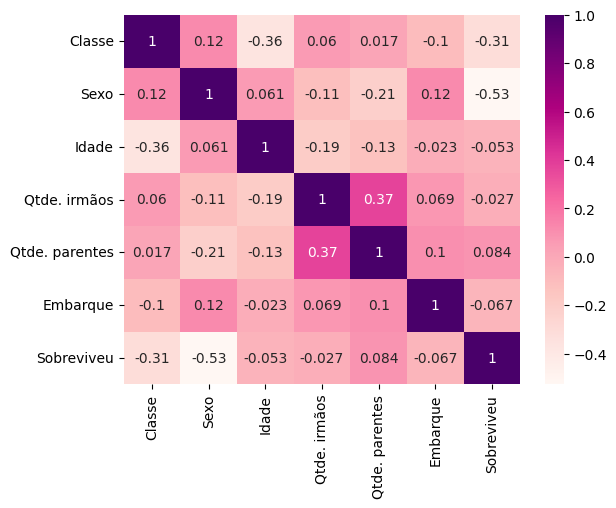

In [17]:
# --- Mapa de calor --- #
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='RdPu'
)
plt.show()

## Separar os dados

In [18]:
# --- Função para separar os dados --- #
from sklearn.model_selection import train_test_split

In [19]:
# --- Separar os dados --- #
X = df.drop('Sobreviveu', axis=1)
y = df['Sobreviveu']
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X,
    y,
    train_size=0.8  # test_size=0.2
)

## Treinar o modelo "idiota"

In [20]:
# --- Importar o classificador Dummy --- #
from sklearn.dummy import DummyClassifier

In [21]:
# --- Criar e treinar o modelo Dummy --- #
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_treino, y_treino)

DummyClassifier(strategy='stratified')

In [22]:
# --- Importar as métricas --- #
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             f1_score,
                             precision_score,
                             recall_score)

In [26]:
def metricas(X_teste, y_teste, classificador, nome_classificador):
  """Função responsável por reetornar as métricas e a matriz de confusão."""
  # --- Prever o resultado --- #
  previsao = classificador.predict(X_teste)

  # --- Acurácia --- #
  acuracia = accuracy_score(y_teste, previsao)

  # --- Precisão --- #
  precisao = precision_score(y_teste, previsao)

  # --- Revocação --- #
  revocacao = recall_score(y_teste, previsao)

  # --- Pontuação F1 --- #
  f1 = f1_score(y_teste, previsao)

  # --- Mostrar as métricas --- #
  print(f'''Classificador: {nome_classificador}
Acurácia: {acuracia:.3f}
Precisão: {precisao:.3f}
Revocação: {revocacao:.3f}
Pontuação F1: {f1:.3f}''')

  # --- Criar a matriz de confusão --- #
  matriz = confusion_matrix(y_teste, previsao)

  # --- Criar uma tabela auxiliar para armazenar os dados reais e da previsão --- #
  tabela_aux = pd.DataFrame(
      matriz,
      index=['Não sobreviveu', 'Sobreviveu'],
      columns=['Não sobreviveu', 'Sobreviveu']
  )

  # --- Tamanho do gráfico --- #
  plt.figure(figsize=(10, 5))

  # --- Criar a parte gráfica da matriz de confusão --- #
  grafico_matriz = sns.heatmap(
      data=tabela_aux,
      annot=True,
      cmap='RdPu',
      fmt='.5g',
      annot_kws={'size': 13}
  )

  # --- Colocar um título no gráfico --- #
  grafico_matriz.set_title(f'Matriz de confusão: {nome_classificador}', fontsize=15, y=1.05)

  # --- Adicionar a legenda aos eixos --- #
  plt.xlabel('Valores previstos', fontsize=13)
  plt.ylabel('Valores reais', fontsize=13)

  # --- Mostrar o gráfico --- #
  plt.show()

Classificador: DummyClassifier
Acurácia: 0.511
Precisão: 0.394
Revocação: 0.387
Pontuação F1: 0.390


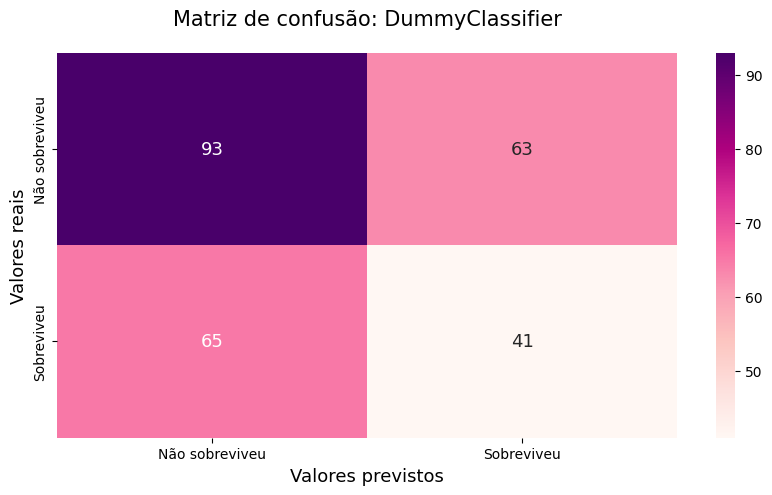

In [27]:
# --- Métricas do modelo Dummy --- #
metricas(X_teste, y_teste, dummy, 'DummyClassifier')

## Treinar os modelos

In [28]:
# --- Importar os modelos --- #
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier)

In [29]:
# --- Dicionário com os modelos --- #
modelos = {
    'SVM': SVC(random_state=1),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=1),
    'MLP': MLPClassifier(random_state=1),
    'KNC': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=1),
    'AdaBoost': AdaBoostClassifier(random_state=1),
    'ExtraTrees': ExtraTreesClassifier(random_state=1),
    'GradintBoosting': GradientBoostingClassifier(random_state=1),
    'RandomForest': RandomForestClassifier(random_state=1)
    }

Classificador: SVM
Acurácia: 0.595
Precisão: 0.000
Revocação: 0.000
Pontuação F1: 0.000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


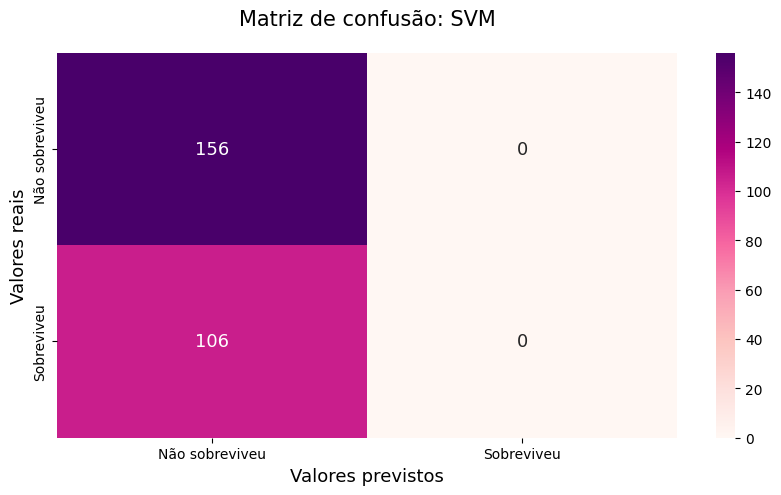

##################################################
Classificador: GaussianNB
Acurácia: 0.790
Precisão: 0.768
Revocação: 0.689
Pontuação F1: 0.726


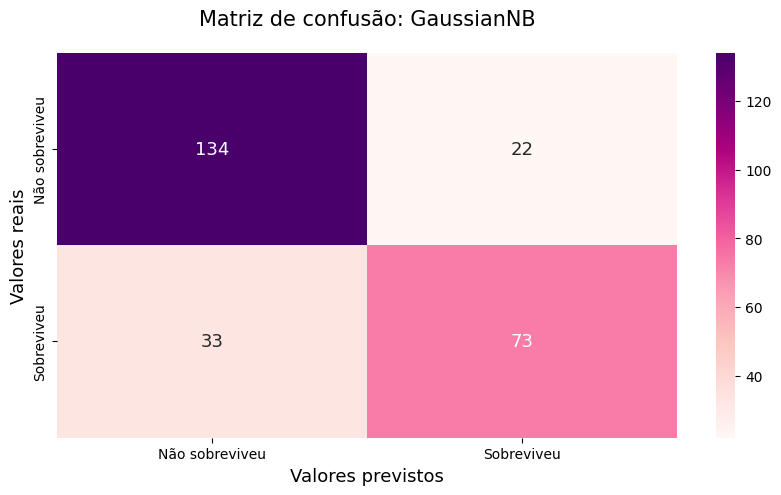

##################################################
Classificador: DecisionTree
Acurácia: 0.756
Precisão: 0.702
Revocação: 0.689
Pontuação F1: 0.695


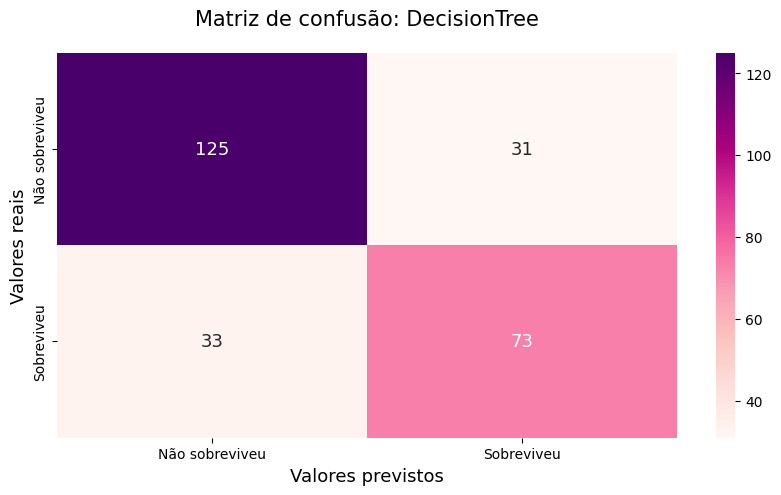

##################################################
Classificador: MLP
Acurácia: 0.405
Precisão: 0.405
Revocação: 1.000
Pontuação F1: 0.576


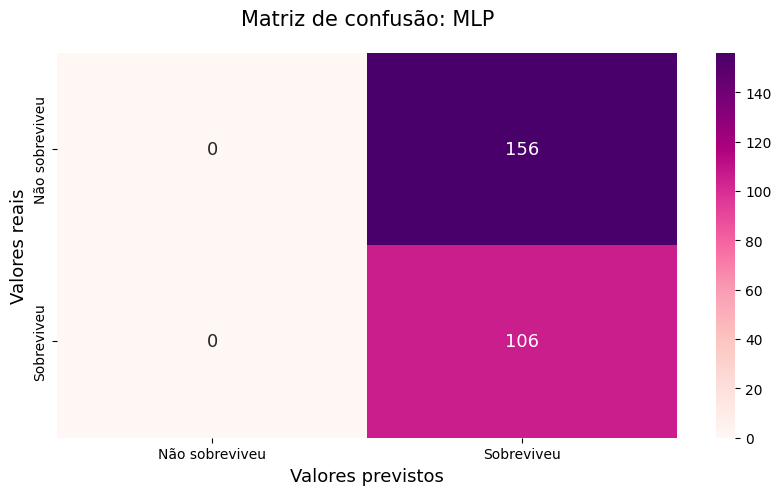

##################################################
Classificador: KNC
Acurácia: 0.756
Precisão: 0.750
Revocação: 0.594
Pontuação F1: 0.663


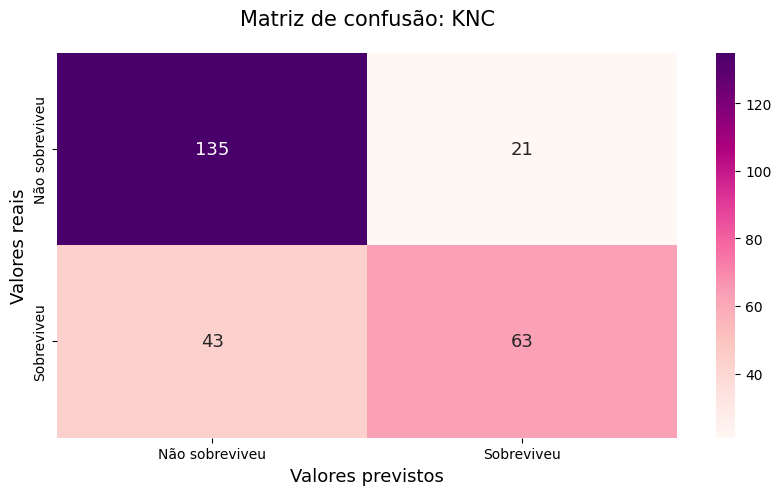

##################################################
Classificador: LogisticRegression
Acurácia: 0.786
Precisão: 0.829
Revocação: 0.594
Pontuação F1: 0.692


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


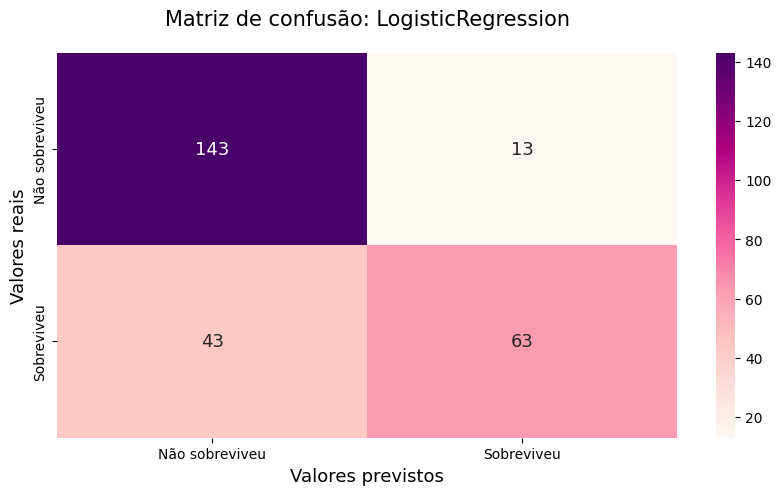

##################################################
Classificador: AdaBoost
Acurácia: 0.817
Precisão: 0.815
Revocação: 0.708
Pontuação F1: 0.758


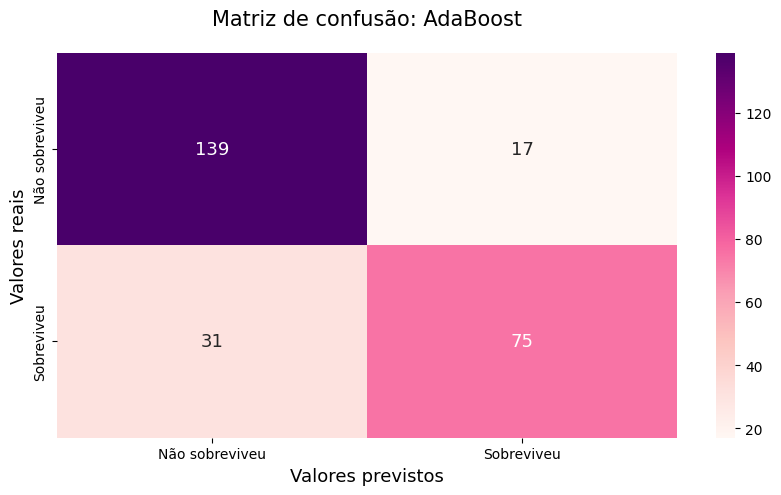

##################################################
Classificador: ExtraTrees
Acurácia: 0.760
Precisão: 0.726
Revocação: 0.651
Pontuação F1: 0.687


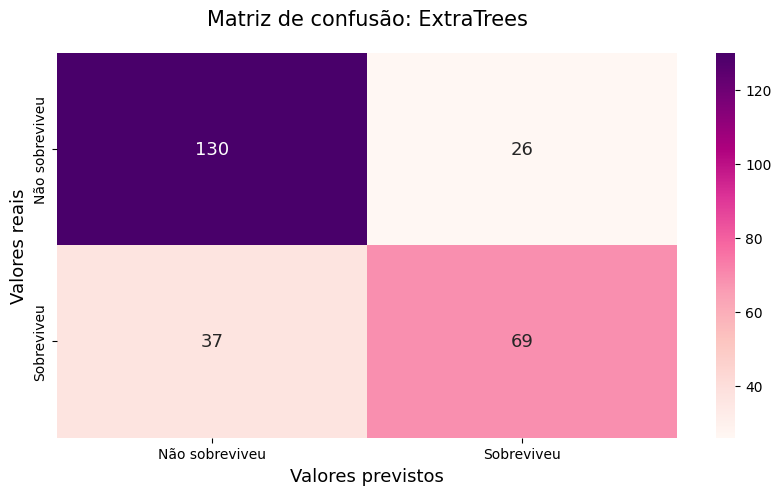

##################################################
Classificador: GradintBoosting
Acurácia: 0.802
Precisão: 0.838
Revocação: 0.632
Pontuação F1: 0.720


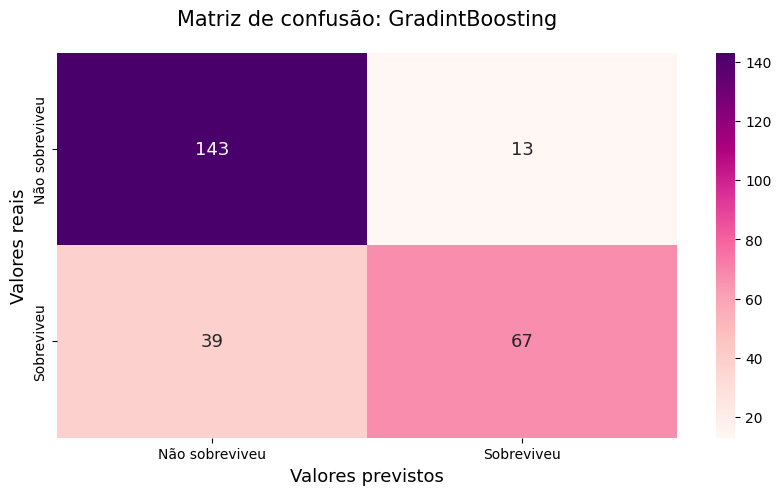

##################################################
Classificador: RandomForest
Acurácia: 0.771
Precisão: 0.730
Revocação: 0.689
Pontuação F1: 0.709


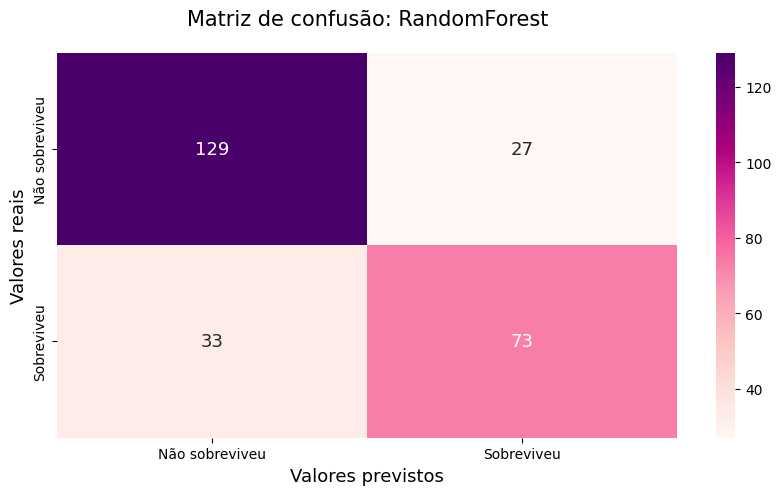

##################################################


In [30]:
# --- Treinar os modelos --- #
for nome_modelo in modelos:
  modelo = modelos[nome_modelo]
  modelo.fit(X_treino, y_treino)
  metricas(X_teste, y_teste, modelo, nome_modelo)
  modelos[nome_modelo] = modelo
  print('#' * 50)

## Tunning do modelo

In [40]:
# --- Importar a função para melhorar o modelo --- #
from sklearn.model_selection import GridSearchCV

In [42]:
# --- Importar a biblioteca do tempo --- #
import time

# --- Parâmetros para melhorar o modelo --- #
parametros = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
     'max_depth': list(range(1, 11)),
     'max_features': list(range(1, 101))}
]

# --- Chamar o modelo --- #
arv_dec = DecisionTreeClassifier()

# --- Melhoramento do modelo --- #
grid_search = GridSearchCV(
    arv_dec,
    parametros,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

t_i = time.time()
grid_search.fit(X_treino, y_treino)
t_f = time.time()
delta = t_f - t_i
print(f'Tempo de melhoramento: {delta // 60} minutos ({delta:.1f} segundos)')

Tempo de melhoramento: 2.0 minutos (163.0 segundos)


In [43]:
# --- Obter os melhores parâmetros --- #
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 5}

Classificador: DecisionTreeClassifier melhorado
Acurácia: 0.809
Precisão: 0.859
Revocação: 0.632
Pontuação F1: 0.728


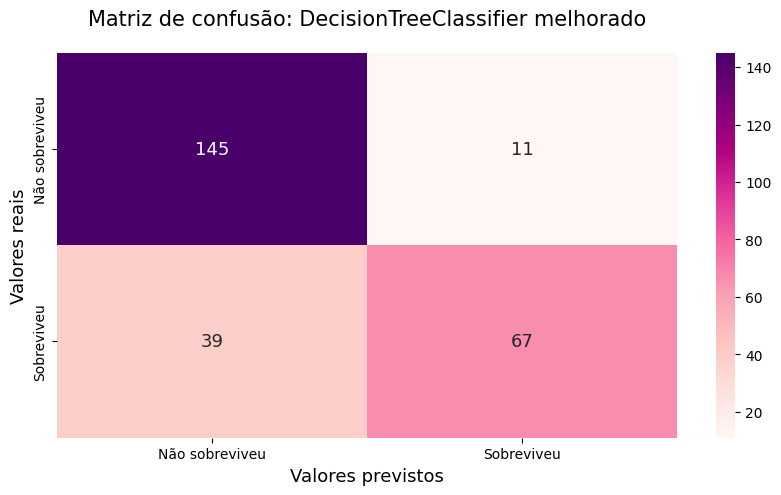

In [44]:
# --- Verificar o modelo com os dados de teste --- #
metricas(X_teste, y_teste, grid_search, 'DecisionTreeClassifier melhorado')

In [46]:
# --- Verificar a importância das features para o modelo --- #
importancia = pd.Series(
    map(lambda x: round(x * 100, 2), grid_search.best_estimator_.feature_importances_),
    index=X_teste.columns
).rename('Importância')
importancia

,Importância
Classe,22.73
Sexo,60.34
Idade,8.58
Qtde. irmãos,6.19
Qtde. parentes,0.07
Embarque,2.09


## Salvar o modelo

In [47]:
# --- Salvar o modelo --- #
from pickle import dump
with open('/content/decisiontree_titanic.pkl', 'wb') as f:
  dump(grid_search, f)